In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
creditScore_DF = pd.read_csv(r"C:\Users\dmoha\Downloads\MLF_GP1_CreditScore.csv")
econCycle_DF = pd.read_csv(r"C:\Users\dmoha\Downloads\MLF_GP2_ECONCYCLE.csv")

### EDA on Credit Score Dataset

In [3]:
creditScore_DF.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.047694,-0.037474,0.263605,-0.232129,-0.223883,0.101245,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,0.352997,-0.108776,-0.099211,0.045420,-0.071864,-0.061909,0.101245,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,0.500174,-0.045288,-0.050011,0.060519,-0.019903,-0.024748,0.027638,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,0.551592,-0.053866,-0.047559,0.142160,-0.098139,-0.092127,0.042437,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,0.753321,-0.059237,-0.049849,0.147989,-0.107808,-0.098904,0.106052,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [4]:
#Check for NA Values
creditScore_DF.isnull().any()

Sales/Revenues              False
Gross Margin                False
EBITDA                      False
EBITDA Margin               False
Net Income Before Extras    False
Total Debt                  False
Net Debt                    False
LT Debt                     False
ST Debt                     False
Cash                        False
Free Cash Flow              False
Total Debt/EBITDA           False
Net Debt/EBITDA             False
Total MV                    False
Total Debt/MV               False
Net Debt/MV                 False
CFO/Debt                    False
CFO                         False
Interest Coverage           False
Total Liquidity             False
Current Liquidity           False
Current Liabilities         False
EPS Before Extras           False
PE                          False
ROA                         False
ROE                         False
InvGrd                      False
Rating                      False
dtype: bool

In [5]:
#Summary Statistics on Numeric Attributes of Dataset
creditScore_DF.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,Free Cash Flow,Total Debt/EBITDA,Net Debt/EBITDA,Total MV,Total Debt/MV,Net Debt/MV,CFO/Debt,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,-0.312325,0.731197,-0.819863,0.092043,1.270202,-0.398624,-0.165088,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,8.895136,12.280493,22.002550,0.385111,22.797054,41.235876,6.277606,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,-238.750000,-0.910486,-495.355952,-0.871567,-0.939190,-781.502439,-172.654240,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,-0.527219,-0.134477,-0.181621,-0.113241,-0.206442,-0.267345,-0.211115,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,-0.058475,-0.012302,-0.034452,0.066836,-0.018464,-0.032055,0.012847,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,0.396581,0.141443,0.163697,0.236566,0.242868,0.274710,0.251992,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,125.785869,256.050232,360.926171,3.961121,676.443064,1352.088710,15.821709,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


In [6]:
moodys_count, moodys_grade = np.unique(creditScore_DF['Rating'], return_counts = True)
moodys_df = pd.DataFrame(moodys_grade, moodys_count)
moodys_df.head()

,0
A1,122
A2,156
A3,31
Aa2,65
Aa3,174


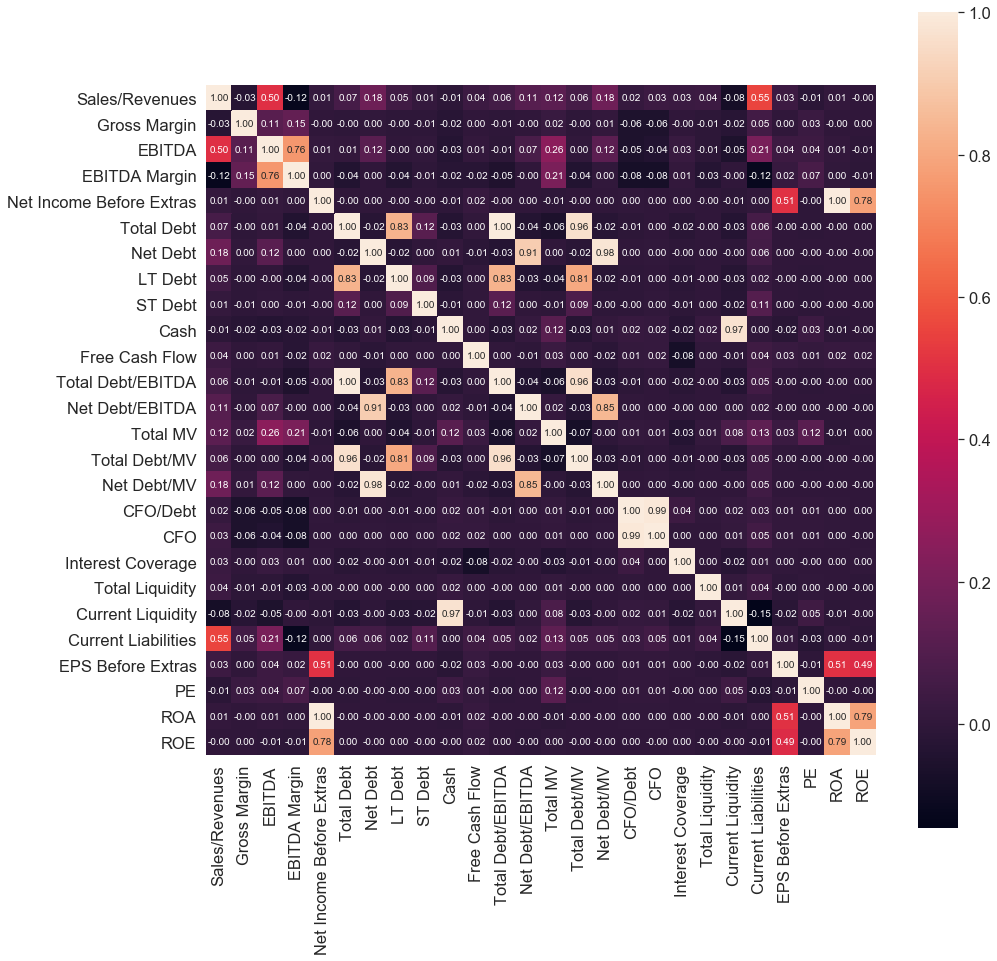

In [7]:
## SNS Correlation Heatmap/plot
import seaborn as sns
column_list = creditScore_DF.iloc[:,:-2].columns.values.tolist()
cm = np.corrcoef(creditScore_DF.iloc[:,:-2].values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(15,15)) 
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=column_list[:],
            xticklabels=column_list[:])

plt.show()

In [8]:
# Split up dataset into dependant and independant variables (attributes & labels)
creditScore_X = scale(creditScore_DF.iloc[:,:-2])
creditScore_y_I = creditScore_DF["InvGrd"]
creditScore_y_R = creditScore_DF["Rating"]

## Logistic Regression & Decision Tree hyperparameter tuning

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint



### Label = Investment Grade

In [10]:
# Train Test Split (using Investment Grade Label)

creditScoreX_train, creditScoreX_test, creditScoreIy_train, creditScoreIy_test = train_test_split(creditScore_X, creditScore_y_I, test_size = 0.25, random_state = 42)

In [18]:
## Hyperparameter tuning with GridSearchCV on Logistic Regression of CreditScoreDataset (Label = Investment Grade)
# Setup parameter ranges
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression(solver = 'liblinear')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(creditScoreX_train, creditScoreIy_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
print("Score of best model is: {}".format(logreg_cv.score(creditScoreX_test, creditScoreIy_test)))


#print("Logistic Regression Parameters {}".format(logreg_cv.get_params))
#print(logreg_cv.intercept_)
#logregcoefDF = pd.DataFrame(
 #   {
  #      'Attribute Coef' : creditScoreX_train.columns,
   #     'Coef Value': logreg_cv.coef_})

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.763921568627451
Score of best model is: 0.76


In [17]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(creditScoreX_train, creditScoreIy_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score from training set is {}".format(tree_cv.best_score_))

creditScoreIy_pred = tree_cv.predict(creditScoreX_test)
print("Accuracy score of tuned decision tree on test set is {}".format(accuracy_score(creditScoreIy_pred, creditScoreIy_test)))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3}
Best score from training set is 0.796078431372549
Accuracy score of tuned decision tree on test set is 0.7952941176470588


### Label = Rating